In [103]:
#needed to make plots show up in-line
%matplotlib inline

In [104]:
#import some useful libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


OUTLINE:

1. vector spaces and vector subspaces

2. spans, bases, and dimensionality

3. orthogonal vectors and hyperplanes

4. linear transforms and matrices

5. matrix multiplication

6. matrix inversion and invertibility

## Vector Spaces and subspaces 

Let's start with the "overall ambient" $n$-dimensional euclidean space $\mathbb{R}^n$.  Recall, each point in $\mathbb{R}^n$ is a vector, like:

$$[x_0, x_1, \ldots, x_{n-1}]$$

where each $x_i$ is a real number. 

Now, DEFINITION:

Informally, a $\textit{subspace}$ of $\mathbb{R}^n$ is just a subset of points (vectors) in $\mathbb{R}^n$ that is closed under linear combination.   

"Closed under linear combination" means that linear combinations of any two vectors in the subspace, are also in the subspace. More mathematically: if $X \subset \mathbb{R}^n$ is our subspace, and $$x, y \in X$$ are any two vectors in $X$, we must have $$ax + by \in X$$ for all scalars $a, b$. 

(-2, 2)

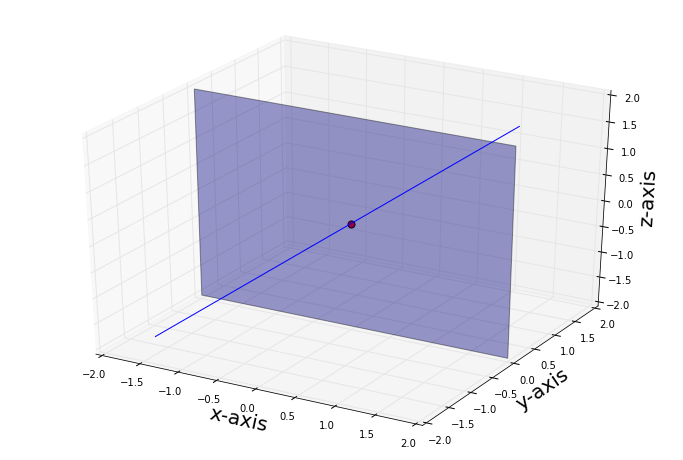

In [105]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

X = np.arange(-2, 3)
Z = np.arange(-2, 3)
X, Z = np.meshgrid(X, Z)
Y = np.zeros_like(X)
ax.plot_surface(X, Y, Z, alpha=.4)

ax.plot([0, 0], [-4, 4], [0, 0])

ax.scatter3D([0], [0], [0], c='red', s=50)

ax.set_xlabel('x-axis', fontsize=20)
ax.set_ylabel('y-axis', fontsize=20)
ax.set_zlabel('z-axis', fontsize=20)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

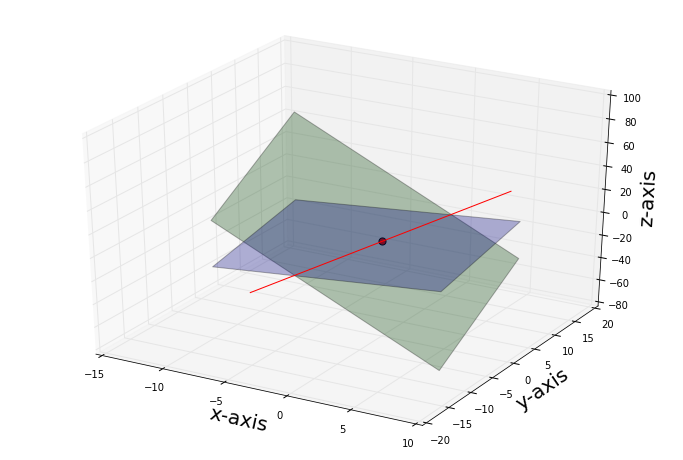

In [106]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

X = np.arange(-10, 10, 2)
Y = np.arange(-10, 10, 2)
X, Y = np.meshgrid(X, Y)

Z = X + Y
ax.plot_surface(X, Y, Z, alpha=.3)

Z1 = -5*X + 3*Y
ax.plot_surface(X, Y, Z1, alpha=.3, color='green')

x = np.array([-5, 5])
y = 3*x
z = x + y
ax.plot(x, y, z, color='red')

ax.scatter3D([0], [0], [0], c='red', s=50)

ax.set_xlabel('x-axis', fontsize=20)
ax.set_ylabel('y-axis', fontsize=20)
ax.set_zlabel('z-axis', fontsize=20)



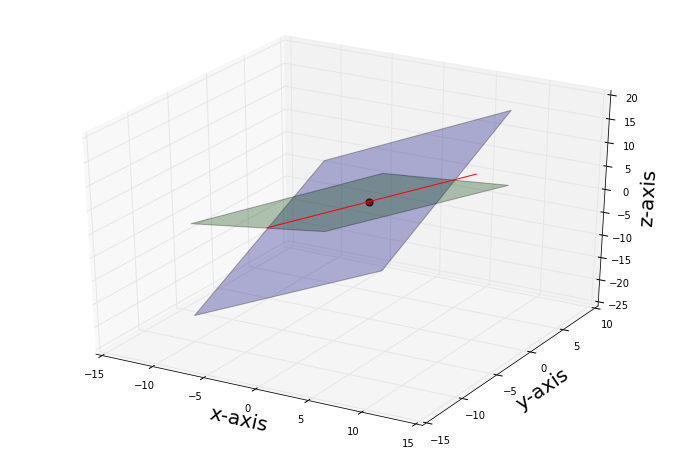

In [107]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

X = np.arange(-10, 10, 2)
Y = np.arange(-10, 10, 2)
X, Y = np.meshgrid(X, Y)

Z = X + Y
ax.plot_surface(X, Y, Z, alpha=.3)

Z1 = X - Y
ax.plot_surface(X, Y, Z1, alpha=.3, color='green')

x = np.array([-10, 10])
y = np.zeros_like(x)
z = x + y
ax.plot(x, y, z, color='red')

ax.scatter3D([0], [0], [0], c='red', s=50)

ax.set_xlabel('x-axis', fontsize=20)
ax.set_ylabel('y-axis', fontsize=20)
ax.set_zlabel('z-axis', fontsize=20)



### span, bases, and dimensionality

DEFINITIONS:

Start with $n$-dimensional space $\mathbb{R}^n$. 

Now let $X = \{\vec{e}_0, \ldots \vec{e}_{k-1}\}$ be a set of $k$ vectors $\mathbb{R}^n$.  The $\textit{span}$ of these vectors is the set of vectors in $\mathbb{R}^n$ that are linear combinations of the vectors. 

$$\text{span}(X) = \{a_0 \vec{e}_0 + a_1 \vec{e}_1 + \ldots + a_{k-1} \vec{e}_{k-1} \quad \text{ for all possible values of } a_0, \ldots, a_{k-1}\}$$

A *basis* for a vector (sub)space is a **minimal** set of vectors whose span is the whole (sub)space.  

The *dimension* of the (sub)space is the number of vectors in the basis.  


In [108]:
#import the 3D plotting library
from mpl_toolkits.mplot3d import Axes3D

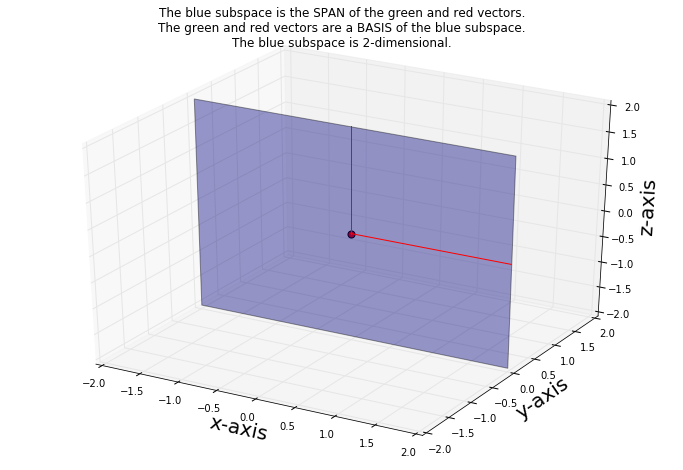

In [109]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

X = np.arange(-2, 3)
Z = np.arange(-2, 3)
X, Z = np.meshgrid(X, Z)
Y = np.zeros_like(X)
ax.plot_surface(X, Y, Z, alpha=.4)

ax.plot([0, 2], [0, 0], [0, 0], color='red')
ax.plot([0, 0], [0, 0], [0, 2], color='green')


ax.scatter3D([0], [0], [0], c='red', s=50)

ax.set_xlabel('x-axis', fontsize=20)
ax.set_ylabel('y-axis', fontsize=20)
ax.set_zlabel('z-axis', fontsize=20)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

plt.title("The blue subspace is the SPAN of the green and red vectors.\nThe green and red vectors are a BASIS of the blue subspace.\nThe blue subspace is 2-dimensional.")

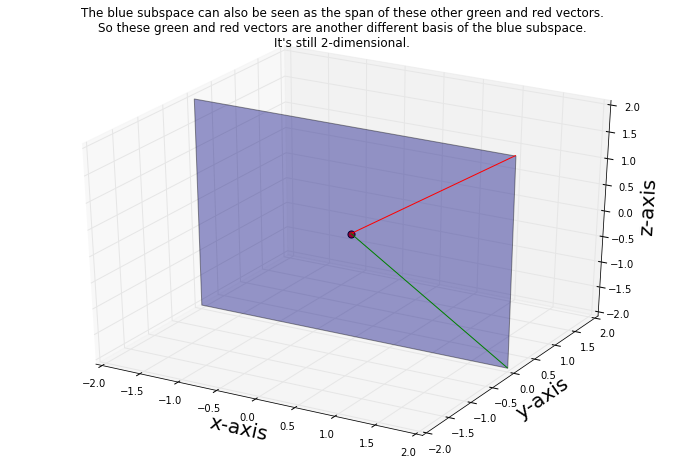

In [175]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

X = np.arange(-2, 3)
Z = np.arange(-2, 3)
X, Z = np.meshgrid(X, Z)
Y = np.zeros_like(X)
ax.plot_surface(X, Y, Z, alpha=.4)

ax.plot([0, 2], [0, 0], [0, 2], color='red')
ax.plot([0, 2], [0, 0], [0, -2], color='green')

ax.scatter3D([0], [0], [0], c='red', s=50)

ax.set_xlabel('x-axis', fontsize=20)
ax.set_ylabel('y-axis', fontsize=20)
ax.set_zlabel('z-axis', fontsize=20)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

plt.title("The blue subspace can also be seen as the span of these other green and red vectors.\nSo these green and red vectors are another different basis of the blue subspace.\nIt's still 2-dimensional.")

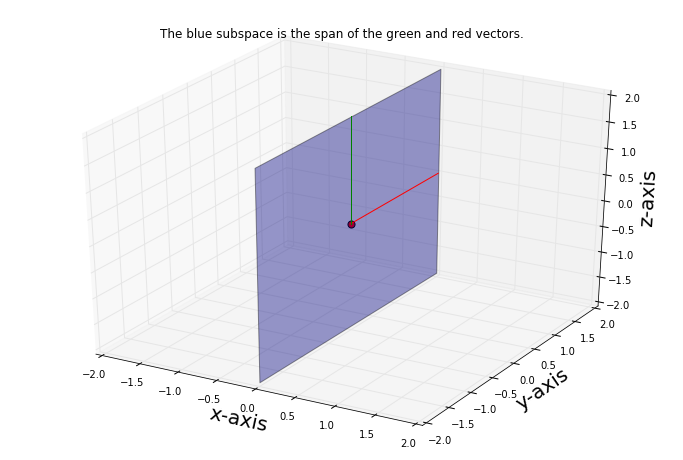

In [111]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

Y = np.arange(-2, 3)
Z = np.arange(-2, 3)
Y, Z = np.meshgrid(Y, Z)
X = np.zeros_like(Y)
ax.plot_surface(X, Y, Z, alpha=.4)

ax.plot([0, 0], [0, 2], [0, 0], color='red')
ax.plot([0, 0], [0, 0], [0, 2], color='green')


ax.scatter3D([0], [0], [0], c='red', s=50)

ax.set_xlabel('x-axis', fontsize=20)
ax.set_ylabel('y-axis', fontsize=20)
ax.set_zlabel('z-axis', fontsize=20)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

plt.title("The blue subspace is the span of the green and red vectors.")

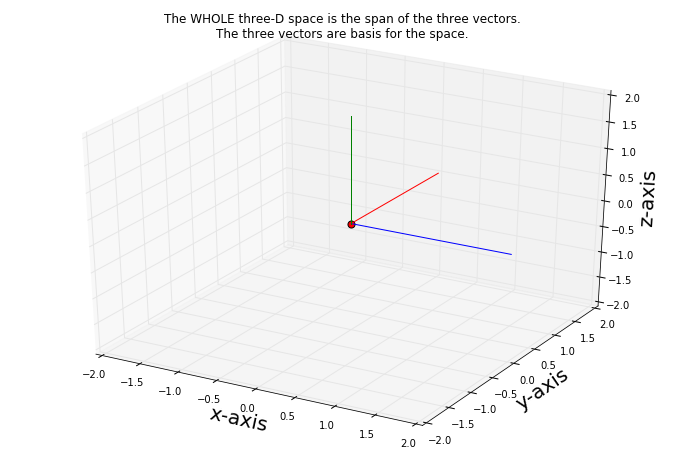

In [176]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot([0, 2], [0, 0], [0, 0], color='blue')
ax.plot([0, 0], [0, 2], [0, 0], color='red')
ax.plot([0, 0], [0, 0], [0, 2], color='green')

ax.scatter3D([0], [0], [0], c='red', s=50)

ax.set_xlabel('x-axis', fontsize=20)
ax.set_ylabel('y-axis', fontsize=20)
ax.set_zlabel('z-axis', fontsize=20)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

plt.title("The WHOLE three-D space is the span of the three vectors.\nThe three vectors are basis for the space.")

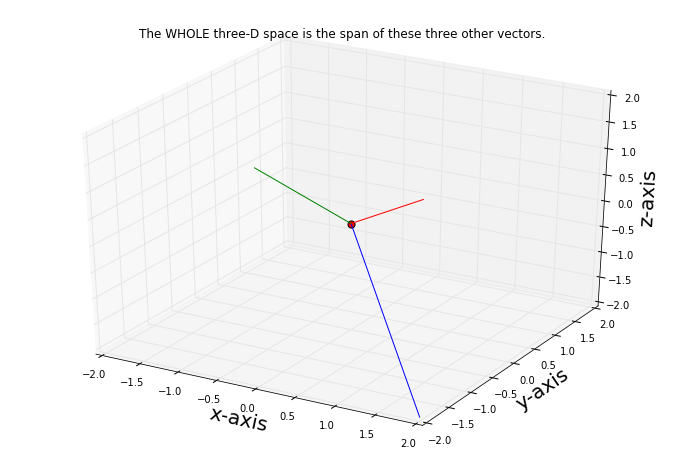

In [113]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot([0, 2], [0, -2], [0, -2], color='blue')
ax.plot([0, 2], [0, -2], [0, 2], color='red')
ax.plot([0, 0], [0, -2], [0, 2], color='green')

ax.scatter3D([0], [0], [0], c='red', s=50)

ax.set_xlabel('x-axis', fontsize=20)
ax.set_ylabel('y-axis', fontsize=20)
ax.set_zlabel('z-axis', fontsize=20)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

plt.title("The WHOLE three-D space is the span of these three other vectors.")

DEFINITION

The **standard basis** for $n$-dimensional vector space $\mathbb{R}^n$ is 

$$\vec{e}_0 = [1, 0, 0, \ldots, 0]$$
$$\vec{e}_1 = [0, 1, 0, \ldots, 0]$$
.
.
.
$$\vec{e}_{n-1} = [0, 0, 0, \ldots, 1].$$

That is: $\vec{e}_i$ has "1" in the $i$-th location, and 0 elsewhere.

### Orthogonal vectors and hyperplanes

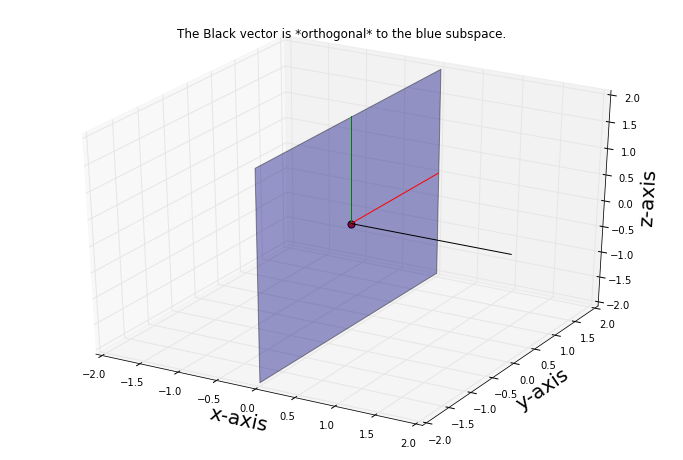

In [297]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

Y = np.arange(-2, 3)
Z = np.arange(-2, 3)
Y, Z = np.meshgrid(Y, Z)
X = np.zeros_like(Y)
ax.plot_surface(X, Y, Z, alpha=.4)

ax.plot([0, 0], [0, 2], [0, 0], color='red')
ax.plot([0, 0], [0, 0], [0, 2], color='green')
ax.plot([0, 2], [0, 0], [0, 0], color='black')


ax.scatter3D([0], [0], [0], c='red', s=50)

ax.set_xlabel('x-axis', fontsize=20)
ax.set_ylabel('y-axis', fontsize=20)
ax.set_zlabel('z-axis', fontsize=20)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

plt.title("The Black vector is *orthogonal* to the blue subspace.")

Principle 1: A vector $v_0$ is orthogonal (or perpendicular) to another vector $v_1$ if their angle is 90, so that means when the cosine of their angle is 0, so that means when their dot-product is 0. That is:

$$v_0 \perp v_1 \quad \quad \text{if and only if} \quad \quad  v_0 \cdot v_1 = 0.$$

DEFINITION: A vector $v_0$ is orthogonal to a subspace $X$ if it is orthogonal to every vector in the subspace. That is, if $v_0 \cdot v = 0$ for all $v \in X$.


Principle 2: A vector $\vec{v}$ is orthogonal to a subspace $X$ if and only if it is orthogonal to every vector in a basis of $X$. So you only have to check orthogonality for a small finite number of vectors, not every point in $X$.

Proof:  Suppose $X \subset \mathbb{R}^n$ is a $k$-dimensional subspace with basis ${\vec{e}_0, \ldots, \vec{e}_{k-1}}$.  Let $\vec{v} \in \mathbb{R}^b$.  Then, if $\vec{v}$ is orthogonal to all the basis elements, we have 

$$\vec{v} \cdot \vec{e}_i = 0$$ 

for all $i=0 \ldots k-1$. But now let $\vec{x}$ be any arbitrary vector in $X$.   Since the ${\vec{e}_0, \ldots, \vec{e}_{k-1}}$ are a basis for $X$, they (by definition) span $X$.  Thus $x$ can (by definition) be written as a linear combination of vectors in that basis.  In other words:

$$x = a_0 \vec{e}_0 + \ldots a_{k-1} \vec{e}_{k-1}$$ 

for some scalars $a_0, \dots, a_{k-1}$.  But then:

$$\vec{v} \cdot \vec{x} = \vec{v} \cdot (a_0 \vec{e}_0 + \ldots + a_{k-1}\vec{e}_{k-1}) = a_0 [\vec{v} \cdot \vec{e}_0] + a_1 [\vec{v} \cdot \vec{e}_1] + \ldots + a_{k-1} [\vec{v} \cdot \vec{e}_{k-1}] = a_0 0 + a_1 0 + \ldots + a_{k-1} 0 = 0$$ 

and thus $\vec{v}$ is orthogonal to $\vec{x}$.  Since $\vec{x}$ was an arbitrary vector in $X$, this must be true for all $x \in X$.  

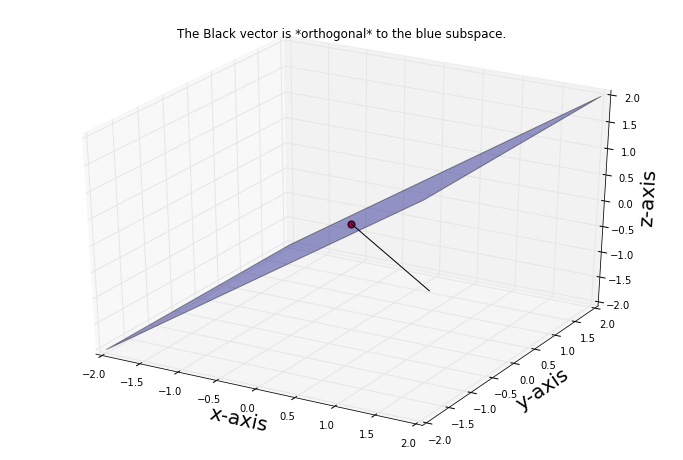

In [316]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

Y = np.arange(-2, 3)
Z = np.arange(-2, 3)
Y, Z = np.meshgrid(Y, Z)
X = Z
ax.plot_surface(X, Y, Z, alpha=.4)

ax.plot([0, 1], [0, 0], [0, -1], color='black')

ax.scatter3D([0], [0], [0], c='red', s=50)

ax.set_xlabel('x-axis', fontsize=20)
ax.set_ylabel('y-axis', fontsize=20)
ax.set_zlabel('z-axis', fontsize=20)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

plt.title("The Black vector is *orthogonal* to the blue subspace.")

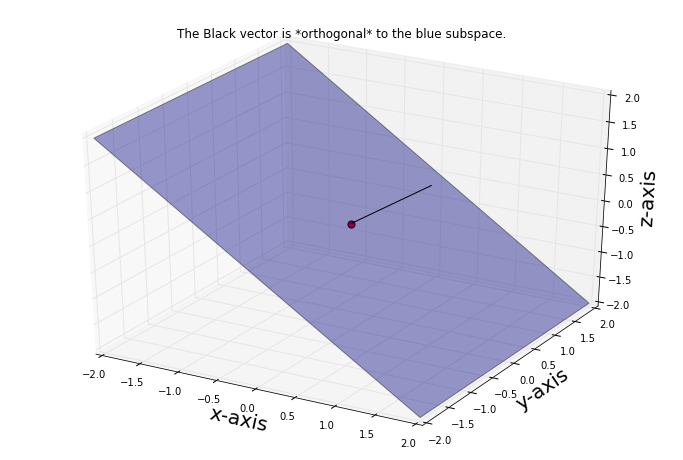

In [317]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

Y = np.arange(-2, 3)
Z = np.arange(-2, 3)
Y, Z = np.meshgrid(Y, Z)
X = -Z
ax.plot_surface(X, Y, Z, alpha=.4)

ax.plot([0, 1], [0, 0], [0, 1], color='black')

ax.scatter3D([0], [0], [0], c='red', s=50)

ax.set_xlabel('x-axis', fontsize=20)
ax.set_ylabel('y-axis', fontsize=20)
ax.set_zlabel('z-axis', fontsize=20)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

plt.title("The Black vector is *orthogonal* to the blue subspace.")

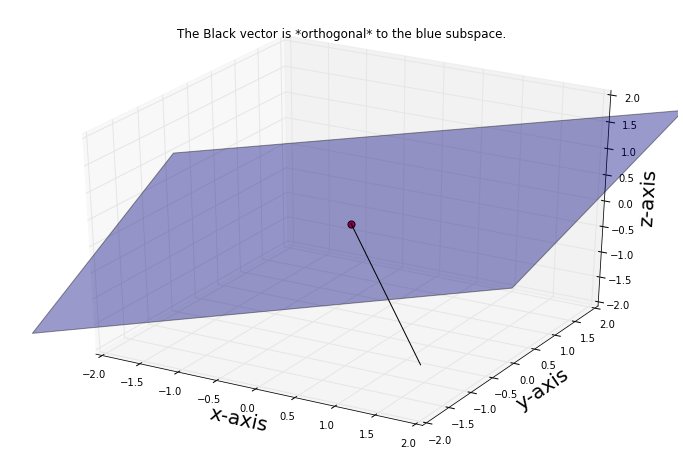

In [328]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

Y = np.arange(-2, 3)
Z = np.arange(-2, 3)
Y, Z = np.meshgrid(Y, Z)
X = 0.5 * Z + Y
ax.plot_surface(X, Y, Z, alpha=.4)

ax.plot([0, 2], [0, -2], [0, -1], color='black')

ax.scatter3D([0], [0], [0], c='red', s=50)

ax.set_xlabel('x-axis', fontsize=20)
ax.set_ylabel('y-axis', fontsize=20)
ax.set_zlabel('z-axis', fontsize=20)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

plt.title("The Black vector is *orthogonal* to the blue subspace.")

DEFINITION: 

A *hyperplane subspace* in $\mathbb{R}^n$ is a subspace of dimension $n-1$. 

A *hyperplane* is a subset $H \subset \mathbb{R}^n$ such that for some vector $\vec{b}=[b_0, \ldots, b_{n-1}]$ (for "bias") and hyperplane subspace $X$, 

$$H = \{\vec{b} + \vec{x} \quad \text{for all } \vec{x} \in X\}.$$

In other words, $H$ is a hyperplane subspace "plus a constant shift".

Principle: A hyperplane is defined by its bias $\vec{b}$, and its orthogonal norm-1 vector. 
 
Specically, a hyperplane $H$ can also be understand as the set of all points $\vec{x} = [x_0, \ldots, x_{n-1}] \in \mathbb{R}^n$ such that
 
 $$a_0 (x_0 - b_0) + a_1 (x_1 - b_1) + \ldots + a_{n-1} (x_{n-1} - b_{n-1}) = 0$$ 

for some constant scalars $a_0, \ldots, a_{n-1}$. In other words, these all the points $\vec{x}$ such that 

 $$\vec{a} \cdot (\vec{x} - \vec{b}) = 0$$
 
where $\vec{a} = [a_0, \ldots, a_{n-1}]$.  The vector $\vec{a}$ is vector with norm 1 that is orthogonal to the hyperplane subspace associated with $H$.

DEFERRED MOTIVATION:

The idea is that a hyperplane "acts like decision boundary," cutting the whole space into 2 pieces (the two parts on either side of the hyperplane).

We will use hyperplanes (and their orthogonal vectors) when learning about logistic regression and categorization. 

## Linear Transforms and Matrices

Recall the idea of a vector-valued function

$$f: \mathbb{R}^n \longmapsto \mathbb{R}^k.$$

A function is called a *linear transform* if 

$$f(a \vec{x} + b \vec{y}) = a f(\vec{x}) + b f(\vec{y})$$ for any scalars $a,b$ and vectors $x, y.$

Why are linear transforms important?  Because they represent the simplest kind of processes that connect variables.

In [85]:
##this is a function whose output k = 1

def mean_times_2(x):
    return 2 * np.mean(x)

In [87]:
e0 = np.array([1, 0])
e1 = np.array([0, 1])
x = e0 + e1
print(mean_times_2(e0))
print(mean_times_2(e1))
print(mean_times_2(x))

1.0
1.0
2.0


In [90]:
##this is a function whose output is equal to the input dimension e.g. k = n

def mult_by_2(x):
    return 2 * x 

In [91]:
x = np.array([1, 1])
mult_by_2(x)

array([2, 2])

In [92]:
def plot_vector2(v, **kwargs):
    """this is a simple plotting function for seeing vectors with arrowheads
    """
    if 'color' in kwargs:
        plt.plot([0, v[0]], [0, v[1]], color=kwargs['color'])
    else:
        plt.plot([0, v[0]], [0, v[1]])
    plt.scatter([0, v[0]], [0, v[1]])
    plt.arrow(0, 0, v[0], v[1], length_includes_head=True, head_width=.1, **kwargs)
    plt.axis('equal')

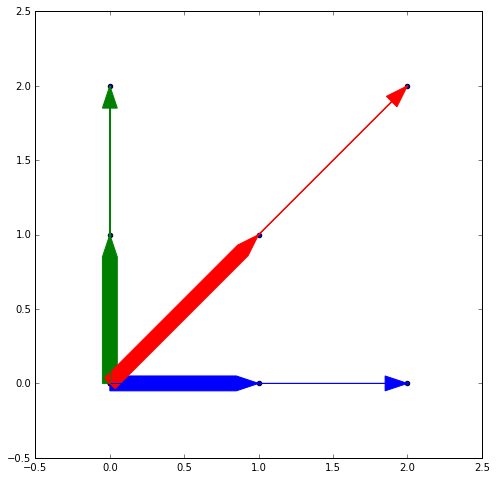

In [94]:
plt.figure(figsize = (8, 8))

e0 = np.array([1, 0])
plot_vector2(e0, facecolor='blue', color='blue', width=0.1)
y0 = mult_by_2(e0)
plot_vector2(y0, facecolor='blue', color='blue')

e1 = np.array([0, 1])
plot_vector2(e1, facecolor='green', color='green', width=0.1)
y1 = mult_by_2(e1)
plot_vector2(y1, facecolor='green', color='green')

x = e0 + e1
plot_vector2(x, facecolor='red', color='red', width=0.1)
y2 = mult_by_2(x)
plot_vector2(y2, facecolor='red', color='red')


In [68]:
def new_function(x):
    x0 = 2 * x[0]
    x1 = -2 * x[1]
    outvec = np.array([x0, x1])
    return outvec
    

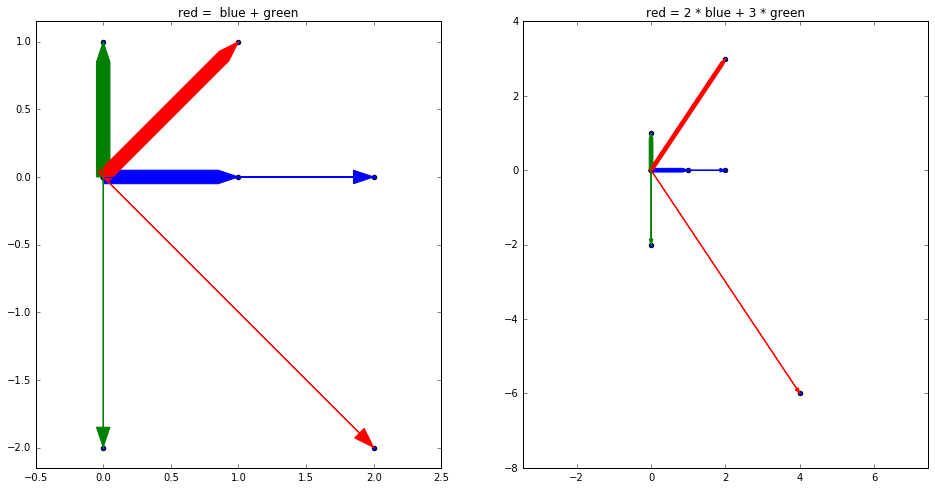

In [100]:
plt.figure(figsize = (16, 8))

plt.subplot(1, 2, 1)
plot_vector2(e0, facecolor='blue', color='blue', width=0.1)
y0 = new_function(e0)
plot_vector2(y0, facecolor='blue', color='blue')

plot_vector2(e1, facecolor='green', color='green', width=0.1)
y1 = new_function(e1)
plot_vector2(y1, facecolor='green', color='green')

x = e0 + e1
plot_vector2(x, facecolor='red', color='red', width=0.1)
y2 = new_function(x)
plot_vector2(y2, facecolor='red', color='red')
plt.title("red =  blue + green")

plt.subplot(1, 2, 2)
plot_vector2(e0, facecolor='blue', color='blue', width=0.1)
y0 = new_function(e0)
plot_vector2(y0, facecolor='blue', color='blue')

plot_vector2(e1, facecolor='green', color='green', width=0.1)
y1 = new_function(e1)
plot_vector2(y1, facecolor='green', color='green')

x = 2*e0 + 3*e1
plot_vector2(x, facecolor='red', color='red', width=0.1)
y2 = new_function(x)
plot_vector2(y2, facecolor='red', color='red')
plt.title("red = 2 * blue + 3 * green")


In [98]:
def new_function2(x):
    x0 = 2 * x[0] - 3*x[1]
    x1 = -2 * x[1] + .5*x[0]
    outvec = np.array([x0, x1])
    return outvec
    

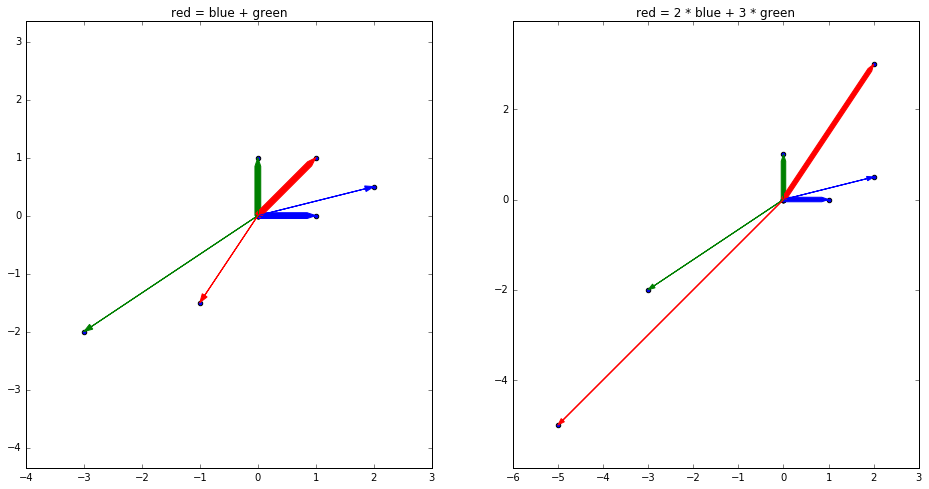

In [101]:
plt.figure(figsize = (16, 8))

plt.subplot(1, 2, 1)
plot_vector2(e0, facecolor='blue', color='blue', width=0.1)
y0 = new_function2(e0)
plot_vector2(y0, facecolor='blue', color='blue')

plot_vector2(e1, facecolor='green', color='green', width=0.1)
y1 = new_function2(e1)
plot_vector2(y1, facecolor='green', color='green')

x = e0 + e1
plot_vector2(x, facecolor='red', color='red', width=0.1)
y2 = new_function2(x)
plot_vector2(y2, facecolor='red', color='red')
plt.title("red = blue + green")

plt.subplot(1, 2, 2)
plot_vector2(e0, facecolor='blue', color='blue', width=0.1)
y0 = new_function2(e0)
plot_vector2(y0, facecolor='blue', color='blue')

plot_vector2(e1, facecolor='green', color='green', width=0.1)
y1 = new_function2(e1)
plot_vector2(y1, facecolor='green', color='green')

x = 2*e0 + 3*e1
plot_vector2(x, facecolor='red', color='red', width=0.1)
y2 = new_function2(x)
plot_vector2(y2, facecolor='red', color='red')
plt.title("red = 2 * blue + 3 * green")


Principle: If $f$ is a linear function then $f$ is defined by its response on basis vectors. 

To see this, let's write any possible input vector $\vec{x}$ in terms of some basis, like this:

$$\vec{x} = a_0 \vec{e}_0 + \ldots + a_{n-1} \vec{e}_{n-1} = \sum_{i=0}^{n-1} a_i \vec{e}_i.$$ 

Now, let's apply the function:

$$f(\vec{x}) = a_0 f(\vec{e}_0) + \ldots + a_{n-1} f(\vec{e}_{n-1}) = \sum_{i=0}^{n-1} a_i f(\vec{e}_i).$$

We've basically just used the fact that $f$ is linear to re-express its value on any input $\vec{x}$ in terms of a linear combination of its values on the basis vectors $\vec{e}_0, \ldots, \vec{e}_{n-1}$. 

Ok, so now, what is $f(\vec{e}_i)$?  It's a vector in $\mathbb{R}^k.$ Thus

$$f(\vec{e}_i) = [a_0, \ldots, a_{k-1}] \in \mathbb{R}^k$$ for some constants $a_0, a_1, \ldots, a_{k-1}$.  **NB: you need a different set of constants for each basis vector**.

So that means that for each of the input basis vectors $\vec{e}_0, \vec{e}_1, \ldots, \vec{e}_{n-1}$, we have a separate $k$-vector describing the action of the linear transform on that basis vector:  

$$f(\vec{e}_0) = [a_{0, 0}, \ldots, a_{0, k-1}]$$

$$f(\vec{e}_1) = [a_{1, 0}, \ldots, a_{1, k-1}]$$

.
.
.

$$f(\vec{e}_{n-1}) = [a_{n-1, 0}, \ldots, a_{n-1, k-1}]$$

Together these vectors can be assembed into a **MATRIX** where the columns correspond to the dimensions of the input space and rows to the dimensions of the output space:
    
$$A = \begin{bmatrix}
    a_{0,0} & a_{0,1} & a_{0,2} & \dots  & a_{0,n-1} \\
    a_{1,0} & a_{1, 1} & a_{1,2} & \dots  & a_{1,n-1} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    a_{k-1,0} & x_{k-1,1} & x_{k-1,2} & \dots  & a_{k-1,n-1}
\end{bmatrix}$$

In [116]:
"""Let's do an example. 

Remember the function from above:

def new_function2(x):
    x0 = 2 * x[0] - 3*x[1]
    x1 = -2 * x[1] + .5*x[0]
    outvec = np.array([x0, x1])
    return outvec
    
What matrix corresponds to this function? 
""";


In [118]:
new_function2(e0)

array([2. , 0.5])

In [119]:
new_function2(e1)

array([-3., -2.])

So the matrix is 
$$A = \begin{bmatrix}
    2 & -3\\
    0.5 & -2 
\end{bmatrix}$$


In [125]:
#Let's do another example
#this is a function where n = 2 and k = 3

def new_function3(x):
    x0 = 2 * x[0] - 3*x[1]
    x1 = -2 * x[1] + .5*x[0]
    x2 = -3 * x[0]
    outvec = np.array([x0, x1, x2])
    return outvec

In [126]:
new_function3(e0)

array([ 2. ,  0.5, -3. ])

In [127]:
new_function3(e1)

array([-3., -2.,  0.])

So the matrix is 
$$A = \begin{bmatrix}
    2 & -3\\
    0.5 & -2\\
    -3 & 0
\end{bmatrix}$$

In [124]:
#Let's do one more example
#this is a function where n = 3 and k = 2

def new_function4(x):
    x0 = 2 * x[0] - 3*x[1] + .1*x[2]
    x1 = -2 * x[1] + .5*x[0] - .5 * x[2]
    outvec = np.array([x0, x1])
    return outvec

In [129]:
e0 = np.array([1, 0, 0])
e1 = np.array([0, 1, 0])
e2 = np.array([0, 0, 1])

print(new_function4(e0))
print(new_function4(e1))
print(new_function4(e2))

[2.  0.5]
[-3. -2.]
[ 0.1 -0.5]


So the matrix is 
$$A = \begin{bmatrix}
    2 & -3 & .1\\
    0.5 & -2 & -0.5
\end{bmatrix}$$

PRINCIPLE:

If you have a linear transform $f: \mathbb{R}^n \longmapsto \mathbb{R}^k$, then the associated matrix has $n$ columns  and $k$ rows, e.g. its of shape $(k, n)$. 

But what is the actual relationship between the matrix and the transfrom it represents?  This is where *matrix multiplication* comes in.   

DEFINITION:

The multiplication of a $(k, n)$ matrix $A$ by an $n$-vector $\vec{v}$ is, by definition the $k$-vector $w$ defined by components as:

$$i\text{-th component of } \vec{w} = w_i = a_{i, 0} v_0  + a_{i, 1} v_1 + \ldots + a_{i, n-1} v_{n-1} = (i\textbf{-th row of }A) \cdot v$$ 

that is, the dot-product of the $i$-th row of the matrix $A$ with the vector.   The notation is again just the dot-product notation, e.g. $A \cdot \vec{v}$. 


PRINCIPLE: if you have a linear transform $f: \mathbb{R}^n \longmapsto \mathbb{R}^k$ with associated matrix $A$, then

$$f(\vec{v}) = A \cdot \vec{v}.$$

That is, a linear transform is computed for any input $\vec{v}$ by multiplying $\vec{v}$ by the matrix $A$. 

$$A \cdot \vec{e}_0 = \begin{bmatrix}
    2 & -3 & .1\\
    0.5 & -2 & -0.5
\end{bmatrix} \begin{bmatrix}
1 \\ 0 \\ 0
\end{bmatrix} = \begin{bmatrix}
2 \\ 0.5
\end{bmatrix} $$

$$A \cdot \vec{e}_1 = \begin{bmatrix}
    2 & -3 & .1\\
    0.5 & -2 & -0.5
\end{bmatrix} \begin{bmatrix}
0 \\ 1 \\ 0
\end{bmatrix} = \begin{bmatrix}
-3 \\ -2
\end{bmatrix} $$

$$A \cdot \vec{e}_2 = \begin{bmatrix}
    2 & -3 & .1\\
    0.5 & -2 & -0.5
\end{bmatrix} \begin{bmatrix}
0 \\ 0 \\ 1
\end{bmatrix} = \begin{bmatrix}
0.1 \\ -0.5
\end{bmatrix} $$

In [177]:
#let's do an exmaple

A = np.array([[2, -3, 0.1], 
              [.5, -2, -.5]])

e0 = np.array([1, 0, 0])
e1 = np.array([0, 1, 0])
e2 = np.array([0, 0, 1])

print(new_function4(e0))
print(new_function4(e1))
print(new_function4(e2))

print('Should be the same as:')
print(np.dot(A, e0))
print(np.dot(A, e1))
print(np.dot(A, e2))

#yep!

[2.  0.5]
[-3. -2.]
[ 0.1 -0.5]
Should be the same as:
[2.  0.5]
[-3. -2.]
[ 0.1 -0.5]


In [137]:
#let's do another exmaple

def new_function3(x):
    x0 = 2 * x[0] - 3*x[1]
    x1 = -2 * x[1] + .5*x[0]
    x2 = -3 * x[0]
    outvec = np.array([x0, x1, x2])
    return outvec

A = np.array([[2, -3], [.5, -2], [-3, 0]])

e0 = np.array([1, 0])
e1 = np.array([0, 1])

print(new_function3(e0))
print(new_function3(e1))

print('Should be the same as:')
print(np.dot(A, e0))
print(np.dot(A, e1))

#yep!

[ 2.   0.5 -3. ]
[-3. -2.  0.]
Should be the same as:
[ 2.   0.5 -3. ]
[-3. -2.  0.]


## Matrix multiplication

Now suppose you have two linear transforms

$$f: \mathbb{R}^n \longmapsto \mathbb{R}^k$$

and 

$$g: \mathbb{R}^k \longmapsto \mathbb{R}^m.$$

You can of course string the two functions together, e.g *compose* them:

$$\mathbb{R}^n \stackrel{f}{\longmapsto} \mathbb{R}^k \stackrel{g}{\longmapsto} \mathbb{R}^m.$$

This makes the new function $h: \mathbb{R}^n \longmapsto \mathbb{R}^m$ defined by 

$$h(x) = g(f(x)).$$

What is the relationship between this composition and the matrices for the functions? 


In [139]:
#remember the two functions from above

def new_function3(x):
    x0 = 2 * x[0] - 3*x[1]
    x1 = -2 * x[1] + .5*x[0]
    x2 = -3 * x[0]
    outvec = np.array([x0, x1, x2])
    return outvec

def new_function4(x):
    x0 = 2 * x[0] - 3*x[1] + .1*x[2]
    x1 = -2 * x[1] + .5*x[0] - .5 * x[2]
    outvec = np.array([x0, x1])
    return outvec

#let's define its composition:
def new_function3then4(x):
    y = new_function3(x)
    z = new_function4(y)
    return z


Recall that $\texttt{new_function3}$ had matrix:

$$A_0 = \begin{bmatrix}
    2 & -3\\
    0.5 & -2\\
    -3 & 0
\end{bmatrix}$$


and $\texttt{new_function4}$ had matrix

$$A_1 = \begin{bmatrix}
    2 & -3 & .1\\
    0.5 & -2 & -0.5
\end{bmatrix}$$

**Question**: what is the matrix of $\texttt{new_function3then4}$ in terms of $A_0$ and $A_1$?

Well, so the action of the first function is 

$$f(\vec{x}) = A_0 \cdot \vec{x}$$

and the second one is 

$$g(\vec{y}) = A_1 \cdot \vec{y}$$

so 

$$g(f(x)) = A_1 \cdot (A_0 \cdot \vec{x}) = (A_1 \cdot A_0) \cdot \vec{x}$$

where $A_1 \cdot A_0$ is the result of doing **matrix multiplcation**.

By definition, if you have two matrix $A_0$ of shape $(n, k)$ and $A_1$ of shape $(k, m)$ the product matrix is of shape $(n, m)$ and is defined-by-entry by:

$$(A_1 \cdot A_0)_{ij} = (i\textbf{-th row of A_1}) \cdot (j\textbf{-th column of A_0}).$$

In [140]:
#First, let's figure out the matrix directly by evaluating the function on 
#the basis vectors e0 and e1

print(new_function3then4(e0))
print(new_function3then4(e1))

[2.2 1.5]
[0.  2.5]


So the assocated matrix is

$$A_2 = \begin{bmatrix}
    2.2 & 0\\
    1.5 & 2.5
\end{bmatrix}
$$

This should be equal to what we get by matrix multiplcation:

$$A2 \stackrel{??}{=} A_1 \cdot A_0 = \begin{bmatrix}
    2 & -3 & .1\\
    0.5 & -2 & -0.5
\end{bmatrix} \cdot 
\begin{bmatrix}
    2 & -3\\
    0.5 & -2\\
    -3 & 0
\end{bmatrix}$$



In [148]:
#now let's get the version from multiplying matrices:
A0 = np.array([[2, -3], [.5, -2], [-3, 0]])
A1 = np.array([[2, -3, .1], [0.5, -2., -0.5]])

#matrix multiplication is annotated in numpy also via the Dot function
np.dot(A1, A0)

#exactly!

array([[2.2, 0. ],
       [1.5, 2.5]])

PRINCIPLE:  The composition of two linear transforms is the matrix multiplication of their associated matrices. 

This idea allows to do some useful stuff.   Like, dilation and rotation. 

DEFERRED MOTIVATION: This is what we'll need to understand both linear regression and PCA.  

For example, suppose wanted to estimate a linear model for one set of factors in terms of the other.  We'll formulate that as the equation

$$Y = A \cdot X$$

where $Y$ is the matrix of outcome variables and $X$ is the matrix of input variables.   The rows of $Y$ and $X$ are the data points, whereas the colums are the different factors.   

#### Dilation (aka diagonal) matrices

Consider the linear function $f$ whose matrix is:

$$A = \begin{bmatrix}
    2 & 0\\
    0 & 2
\end{bmatrix}$$

What does this function do?  Well, it's easy to understand if you just keep applying it over and over again. Like if you apply it $N$ times you get:

$$x_0 \stackrel{f}{\mapsto} A \cdot x_0 \stackrel{f}{\mapsto} A^2 \cdot x_0 \stackrel{f}{\mapsto} \ldots A \stackrel{f}{\mapsto} A^N \cdot x_0.$$

But 
$$\begin{bmatrix}
    2 & 0\\
    0 & 3
\end{bmatrix}^N = \begin{bmatrix}
    2^N & 0\\
    0 & 3^N
\end{bmatrix}.$$

As $N$ increases, $2^N$ gets very big very quickly.  For example if $N = 20$ and we start with initial vector $[1, 0.5]$ then

$$\begin{bmatrix}
    2^{20} & 0\\
    0 & 3^{20}
\end{bmatrix} \cdot \begin{bmatrix}
    1\\
    0.5
\end{bmatrix} = \begin{bmatrix}
    2^{20}\\
    0.5*3^{20}
\end{bmatrix} = \begin{bmatrix}
    1048576\\
    1743392200.5
\end{bmatrix}$$

So this matrix essentially rapidly dilates vectors.  It's a dilation matrix!

On the other hand if 
$$A = \begin{bmatrix}
    0.5 & 0\\
    0 & .3
\end{bmatrix}$$


Then
$$\begin{bmatrix}
    0.5 & 0\\
    0 & 0.3
\end{bmatrix}^N = \begin{bmatrix}
    2^N & 0\\
    0 & 2^N
\end{bmatrix}.$$

As $N$ increases, $.5^N$ gets very small very quickly.  For example if $N = 10$ and we start with initial vector $[1, 0.5]$ then

$$\begin{bmatrix}
    0.5^{10} & 0\\
    0 & 0.3^{10}
\end{bmatrix} \cdot \begin{bmatrix}
    1\\
    0.5
\end{bmatrix} = \begin{bmatrix}
    0.5^{10}\\
    0.5*0.3^{10}
\end{bmatrix} = \begin{bmatrix}
    0.0009765625\\
    2.9524499999999987 * 10^{-6}
\end{bmatrix}$$

So this matrix rapidly compressess vectors.

#### Rotation matrices

Now consider the matrix

$$A = \begin{bmatrix}
    0 & 1\\
    -1 & 0
\end{bmatrix}.$$

What does this do? 

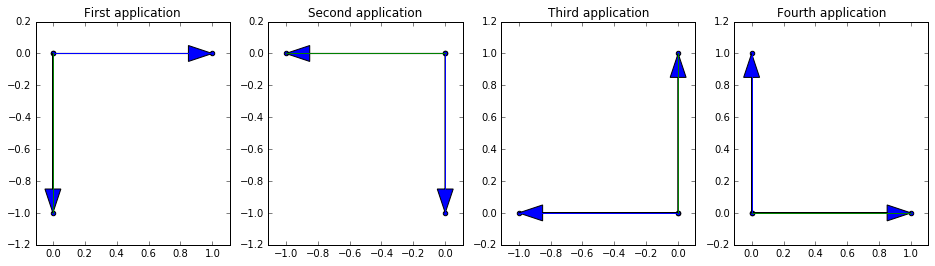

In [158]:
e0 = np.array([1, 0])
A = np.array([[0, 1], 
              [-1, 0]])
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
y = np.dot(A, e0)
plot_vector2(e0)
plot_vector2(y)
plt.title("First application")

plt.subplot(1, 4, 2)
y2 = np.dot(A, y)
plot_vector2(y)
plot_vector2(y2)
plt.title("Second application")

plt.subplot(1, 4, 3)
y3 = np.dot(A, y2)
plot_vector2(y2)
plot_vector2(y3)
plt.title("Third application")

plt.subplot(1, 4, 4)
y4 = np.dot(A, y3)
plot_vector2(y3)
plot_vector2(y4)
plt.title("Fourth application")

Aha, that matrix is a *rotation* function in 2D, rotating by 90 degrees (counterclockwise).

In general, 

$$\text{rotation by }\theta = \begin{bmatrix} \cos(\theta) & \sin(\theta)\\ \sin(\theta) & -cos(\theta)\end{bmatrix}.$$

So if you repeat this $\theta$-rotation $N$ times, you get:

$$\text{rotation by }\theta, N \text{ times} = \begin{bmatrix} \cos(\theta) & \sin(\theta)\\ \sin(\theta) & -cos(\theta)\end{bmatrix}^N = \begin{bmatrix} \cos(N \theta) & \sin(N \theta)\\ \sin(N \theta) & -cos(N \theta)\end{bmatrix}.$$

## Matrix transpose and covariance

DEFINITION. If we start with the general $(k, n)$ matrix:

$$A = \begin{bmatrix}
    a_{0,0} & a_{0,1} & a_{0,2} & \dots  & a_{0,n-1} \\
    a_{1,0} & a_{1, 1} & a_{1,2} & \dots  & a_{1,n-1} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    a_{k-1,0} & x_{k-1,1} & x_{k-1,2} & \dots  & a_{k-1,n-1}
\end{bmatrix}$$

the *transpose* of $A$, denoted by $A^T$ is defined as the $(n, k)$ matrix

$$A^T = \begin{bmatrix}
    a_{0,0} & a_{1,0} & a_{2, 0} & \dots  & a_{k-1, 0} \\
    a_{0,1} & a_{1, 1} & a_{2, 1} & \dots  & a_{k-1,1} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    a_{0, n-1} & x_{1, n-1} & x_{2, n-1} & \dots  & a_{k-1, n-1}
\end{bmatrix}$$

Why do we care about this transpose thing?  

Well, let's consider two vectors $\vec{v}, \vec{w}$, thought of as a single-column $(k, 1)$-matrices:

$$\vec{v} = \begin{bmatrix}
    v_{0} \\
    v_{1} \\
    \vdots  \\
    v_{k-1}
\end{bmatrix} \quad \text{and} \quad 
\vec{w} = \begin{bmatrix}
    w_{0} \\
    w_{1} \\
    \vdots  \\
    w_{k-1}
\end{bmatrix}.$$

The transpose of (say) $\vec{w}$ is the single-row $(1, k)$-matrix:

$$\vec{w}^T = \begin{bmatrix}
    w_{0} & w_{1} \ldots w_{k-1}
\end{bmatrix}.$$

Now, recall that very useful thing, the dot-product:

$$\vec{v} \cdot \vec{w} = \sum_{i=0}^{k-1} v_i w_i.$$

Notice that, from the definition of matrix multiplication, that

$$\vec{w}^T \cdot \vec{v} = \vec{w}^T = \begin{bmatrix}
    w_{0} & w_{1} \ldots w_{k-1}
\end{bmatrix} \cdot \begin{bmatrix}
    v_{0} \\
    v_{1} \\
    \vdots  \\
    v_{k-1}
\end{bmatrix} =  \sum_{i=0}^{k-1} v_i w_i = \vec{v} \cdot \vec{w}.$$

where on the left-hand-side $\cdot$ means matrix multiplication and on the right hand side $\cdot$ just means the original vector dot product. 

In the above, $\vec{w}^T \cdot \vec{v}$ (as matrices), is multiplying a single $(1, k)$-matrix with a $(k, 1)$ matrix to get a $(1, 1)$ matrix -- really just a scalar.  

Now let's take the special case where $\vec{w} = \vec{v}$, e.g. 

$$\vec{v}^T \cdot \vec{v} = \begin{bmatrix}
    v_{0} & v_{1} \ldots v_{k-1}
\end{bmatrix} \cdot \begin{bmatrix}
    v_{0} \\
    v_{1} \\
    \vdots  \\
    v_{k-1}
\end{bmatrix} = \sum_{i=0}^{k-1} v_i^2 = ||\vec{v}||^2.$$

This whole analysis can be extended to matrices. If you have two matrices with the same number of rows, say a $(k, n)$ matrix $A$ and a $(k, m)$ matrix $B$, then 

$$B^T \cdot A \quad \text{is an $(m, n)$ matrix.}$$

In the special case that $B = A$, then 

$$A^T \cdot A \quad \text{is a symmetric $(n, n)$ matrix}.$$

$A^T \cdot A$ is very useful, and is sometimes called the *data covariance* matrix.  The key fact is that the $i,j$-th entry of $A^T \cdot A$ is

$$(A^T \cdot A)_{ij} = (i\textbf{-th column of } A) \cdot (j\textbf{-th column of } A)\text{, treated as vectors.}$$

## Matrix inversion

If you have a linear transform $f: \mathbb{R}^n \longmapsto \mathbb{R}^n$, what is its inverse?  

If the matrix associated with $f$ is $A$ then applying the function go $\vec{v}$ gives

$$\vec{w} = A \cdot \vec{v}.$$

Thus, we should be able to invert this operation by "solving for v"...

$$\vec{v} = A^{-1} \vec{w}.$$

Can we do this?  Well, under some circumstances. 


First, we need to know that if $f$ is invertible at all, and is a linear transform, so is its inverse also a linear transform.  Is that true?  
Yes. 

[MATHEMATICAL INTERLUDE 

Proof: Let $\vec{y}_0, \vec{y}_1$ by vectors and $a, b$ be scalars.  Now let $\vec{x}_0 = f^{-1}(\vec{y}_0)$ and $x_1 = f^{-1}(\vec{y}_1)$.  Then



\begin{align}
f^{-1}(a \vec{y}_0 + b \vec{y}_1) &= f^{-1}(a f(\vec{x}_0) + b f(\vec{x}_1) \\
                                  &= f^{-1}(f(a \vec{x}_0) + f(b \vec{y}_0) \\
                                  &= f^{-1}f(a \vec{x}_0 + b \vec{y}_0) \\
                                  &= a \vec{x}_0 + b \vec{y}_0 \\
                                  &= a f^{-1}(\vec{y}_0) + b f^{-1}(\vec{y}_1)
\end{align}

and thus $f^{-1}$ is also a linear transform.

END INTERLUDE]

So this means that, since $f^{-1}$ is a linear transform, it also is represented by a matrix.  If $A$ is the matrix for the function $f$, we'll call the matrix for $f^{-1}$ by $A^{-1}$.  

Whatever it is in any given case, $A^{-1}$ is the matrix such that 

$$A^{-1} \cdot A = \mathbf{Id}_n$$ 

where $\mathbf{Id}_n$ is the identity matrix, e.g. with 1's along the diagonal and 0s everywhere else.

CAVEAT: **IF** the inverse exists at all!  What if $f$ is not invertible? 

$$A = \begin{bmatrix}2 & 0 \\ 0 & 0.5 \end{bmatrix}$$

$$A^{-1} = \begin{bmatrix}1/2 & 0 \\ 0 & 2 \end{bmatrix}$$

In [160]:
#let's do an example

A = np.array([[2, 0], [0, .5]])
 
Ainv = np.array([[.5, 0], [0, 2]])

np.dot(Ainv, A)

#So Ainv is the inverse of A

array([[1., 0.],
       [0., 1.]])

In general it's hard to find the inverse.  

There *is* a tedious formula for 2x2 matrices.  Namely, if our matrix is

$$A = \begin{bmatrix}a & b \\ 
                     c & d
      \end{bmatrix}$$
      
then

$$A^{-1} = \frac{1}{ad - bc} \begin{bmatrix}d & -b \\ 
                     -c & a
      \end{bmatrix}.$$ 
      
(You can prove the formula by just doing $A^{-1} \cdot A$ and seeing that it works out to the identity.)

This formula is sort of hard to get much intuition from and actually -- there's no really good way to generalize it to larger matrices.  

But one useful thing the formula *does* tell us is when the matrix is *not* invertible:  Namely, when that expression in the denominator is 0:

$$ad - bc = 0 \quad \Leftrightarrow \quad \frac{1}{ad - bc} \text{ is undefined} \quad \Leftrightarrow \quad A \text{ is not invertible}.$$

Let's do an example: 

$$A = \begin{bmatrix}1 & 1 \\ 
                  1 & 1
      \end{bmatrix}.$$
      
In this case, $a = b = c = d = 1$, so $ad - bc = 1\cdot1 - 1\cdot1 = 0.$

Why is this matrix not invertible intuitively?  Well, lets think about it in terms of the linear transform it instantiates.  For any vector $\vec{v} = [v_0, v_1]$,  the function is $f: \mathbb{R}^2 \mapsto \mathbb{R}^2$ given by

$$A \cdot \vec{v} =  \begin{bmatrix}1 & 1 \\ 
                  1 & 1
      \end{bmatrix} \cdot \begin{bmatrix}v_0 \\ v_1\end{bmatrix} = \begin{bmatrix}v_0 + v_1 \\ v_0 + v_1\end{bmatrix}$$
      
This function is not invertible because it maps many input points to the same output.  For example, $[0, 2]$ and $[1, 1]$ both get mapped to $[2, 2]$.  Moreover, many points are not covered by at all, e.g. no input will generate the output $[0, 1]$.


In [172]:
# numpy will compute the inverse for you 

A = np.array([[2, 3, 1], [1, -3, 2], [-.5, .3, 2]])

Ainv = np.linalg.inv(A)

print(Ainv)
print(np.dot(Ainv, A))

[[ 0.28205128  0.24358974 -0.38461538]
 [ 0.12820513 -0.19230769  0.12820513]
 [ 0.05128205  0.08974359  0.38461538]]
[[ 1.00000000e+00 -6.23432929e-17  1.11022302e-16]
 [-2.77555756e-17  1.00000000e+00 -5.55111512e-17]
 [ 0.00000000e+00 -3.48012217e-17  1.00000000e+00]]


DEFERRED MOTIVATION:

Why do we care so much about inversion?   Well suppose wanted to estimate a linear model for one set of factors in terms of the other:

$$Y = A \cdot X$$

where $Y$ is the matrix of outcome variables and $X$ is the matrix of input variables. 

Goal: We want to find $A$.   How?   Well what we'd essentially like to do is "solve for $A$":

$$A = Y X^{-1}.$$

When will this directly be possible?

Of course, it's impossible to invert non-square matrices, e.g. when $n \neq k$. That's because if you have a linear transform

$$f: \mathbb{R}^n \longmapsto \mathbb{R}^k$$

it *can't possibly* be invertible when $n \neq k$: the two spaces are of different dimensions and can't be put into good correspondence with each other.  

In [174]:
#let's see what happens 

A = np.array([[2, 3], [1, -3], [-.5, .3]])

Ainv = np.linalg.inv(A)

#numpy issues a burpy error: the matrix isn't square, e.g. n != k

LinAlgError: Last 2 dimensions of the array must be square

There is a solution to this problem so that we can essentially carry out the program of inverting $X$ so we can solve for $A$ above ... called the Pseudo-inverse.   We'll talk about that in 253 itself when we get to regression. 